In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [66]:
d=pd.read_csv("/content/drive/MyDrive/zomato.csv")

In [507]:
df=d.copy()

In [508]:
len(df)

51717

In [509]:
df = df.drop(['url','name', 'address', 'phone','location','reviews_list','dish_liked','menu_item'], axis=1)


In [510]:
df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51717 non-null  object
 1   book_table                   51717 non-null  object
 2   rate                         43942 non-null  object
 3   votes                        51717 non-null  int64 
 4   rest_type                    51490 non-null  object
 5   cuisines                     51672 non-null  object
 6   approx_cost(for two people)  51371 non-null  object
 7   listed_in(type)              51717 non-null  object
 8   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


In [512]:
print(df['rest_type'].unique())
print(df['listed_in(city)'].unique())
print(df['listed_in(type)'].unique())

['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' nan 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casual Dining, Pub' 'Lounge, Bar'
 'Food Court, Dessert Parlor' 'Casual Dining, Sweet Shop'
 'Food Court, Casual Dining' 'Casual Dining, Microbrewery'
 'Sweet Shop, Desser

In [513]:
# prompt: create column which stores number of cuisines in the 'cuisines' column

df['num_cuisines'] = df['cuisines'].str.split(',').str.len()


In [568]:
df.head()

,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),num_cuisines
0,Yes,Yes,4.1/5,775,Casual Dining,800,Buffet,Banashankari,3.0
1,Yes,No,4.1/5,787,Casual Dining,800,Buffet,Banashankari,3.0
2,Yes,No,3.8/5,918,"Cafe, Casual Dining",800,Buffet,Banashankari,3.0
3,No,No,3.7/5,88,Quick Bites,300,Buffet,Banashankari,2.0
4,No,No,3.8/5,166,Casual Dining,600,Buffet,Banashankari,2.0


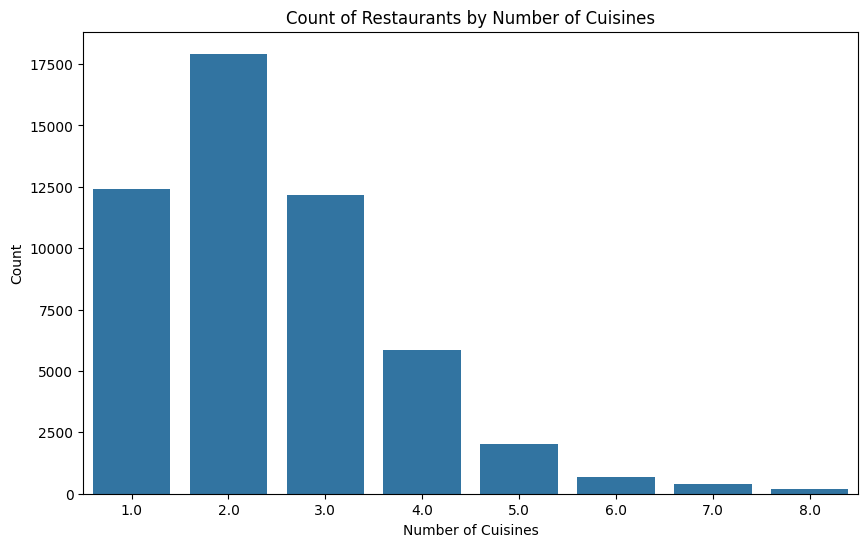

In [514]:
# prompt: countplot 'num_cuisines'

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='num_cuisines', data=df)
plt.title('Count of Restaurants by Number of Cuisines')
plt.xlabel('Number of Cuisines')
plt.ylabel('Count')
plt.show()


In [515]:
# prompt: drop cuisines column

df = df.drop(['cuisines'], axis=1)


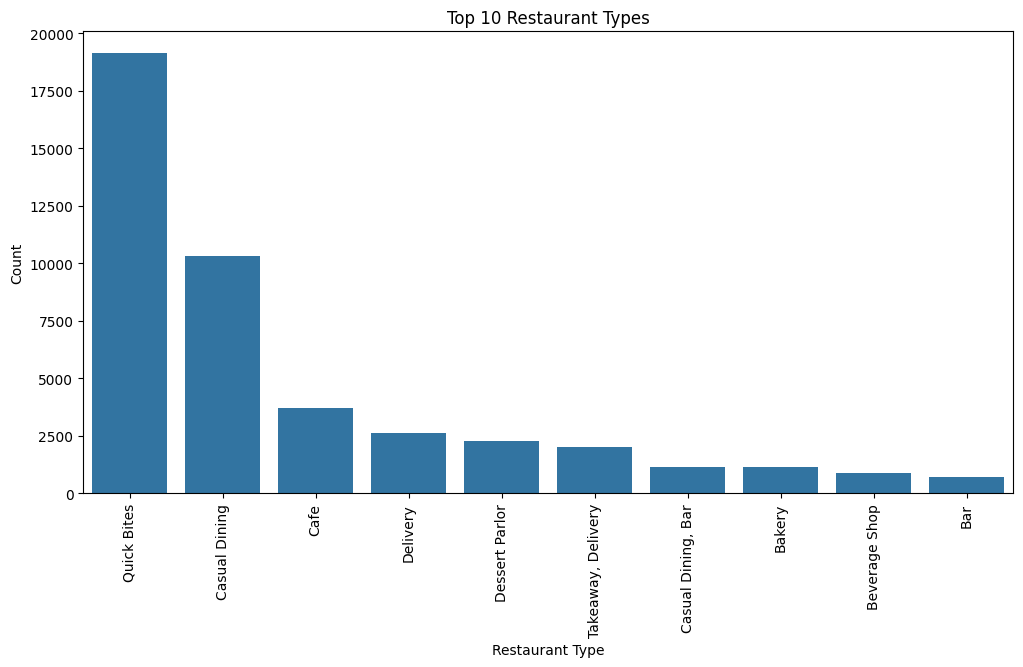

In [516]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'rest_type' is the column you want to plot
# Count the occurrences of each 'rest_type'
rest_type_counts = df['rest_type'].value_counts()

# Select the top 10 most frequent restaurant types
top_10_rest_types = rest_type_counts.head(10)

# Create a countplot using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='rest_type', data=df, order=top_10_rest_types.index)
plt.xticks(rotation=90)
plt.title('Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.show()


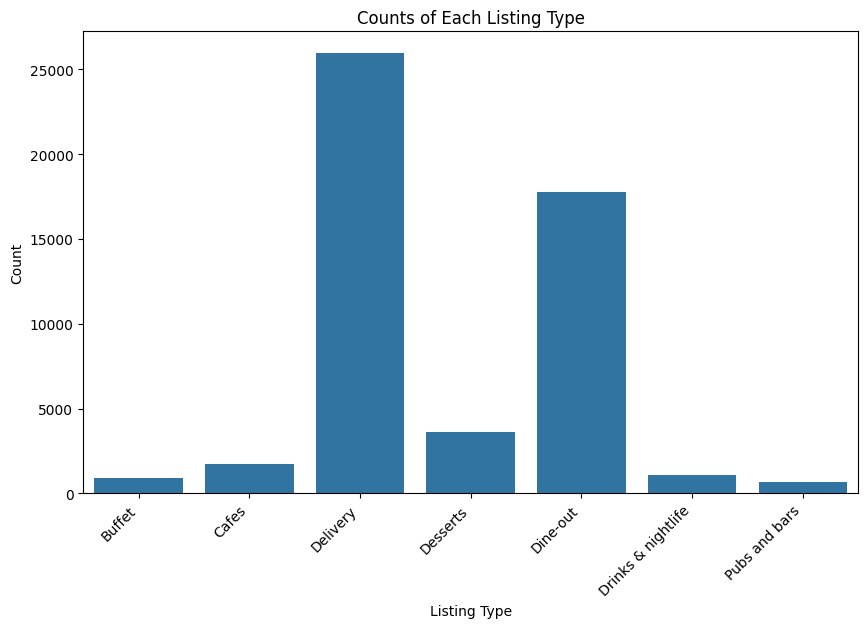

In [517]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='listed_in(type)', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Listing Type')
plt.ylabel('Count')
plt.title('Counts of Each Listing Type')
plt.show()


In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51717 non-null  object 
 1   book_table                   51717 non-null  object 
 2   rate                         43942 non-null  object 
 3   votes                        51717 non-null  int64  
 4   rest_type                    51490 non-null  object 
 5   approx_cost(for two people)  51371 non-null  object 
 6   listed_in(type)              51717 non-null  object 
 7   listed_in(city)              51717 non-null  object 
 8   num_cuisines                 51672 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 3.6+ MB


cleaning data

In [519]:
df=df[df['rate'] !='NEW']
df=df[df['rate'] !='-']
data = df.dropna(subset=['rest_type', 'num_cuisines'])
data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'num_cuisines'],
      dtype='object')

In [520]:
# Remove '/5' from 'rate' and convert to numeric
data['rate'] = data['rate'].str.replace('/5', '')
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')
# Convert 'votes' to numeric
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')
# Remove commas from 'approx_cost(for two people)' and convert to numeric
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',', '')
data['approx_cost(for two people)'] = pd.to_numeric(data['approx_cost(for two people)'], errors='coerce')

<ipython-input-520-3f7e9f7a2998>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate'] = data['rate'].str.replace('/5', '')
<ipython-input-520-3f7e9f7a2998>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate'] = pd.to_numeric(data['rate'], errors='coerce')
<ipython-input-520-3f7e9f7a2998>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [521]:
def clean_categorical_columns(value, common_values):
    if pd.isnull(value):
        return pd.NaT
    elif value in common_values:
        return value
    else:
        return 'Other'

# Keep top 10 most common locations, restaurant types, cuisines,cities and types
top_rest_types = data['rest_type'].value_counts()[:10].index.tolist()
top_types = data['listed_in(type)'].value_counts()[:10].index.tolist()
top_cities=data['listed_in(city)'].value_counts()[:10].index.tolist()
#clean all these columns
data['rest_type'] = data['rest_type'].apply(clean_categorical_columns, common_values=top_rest_types)
data['listed_in(type)'] = data['listed_in(type)'].apply(clean_categorical_columns, common_values=top_types)
data['listed_in(city)'] = data['listed_in(city)'].apply(clean_categorical_columns, common_values=top_cities)


<ipython-input-521-35b2dde7ec27>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rest_type'] = data['rest_type'].apply(clean_categorical_columns, common_values=top_rest_types)
<ipython-input-521-35b2dde7ec27>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['listed_in(type)'] = data['listed_in(type)'].apply(clean_categorical_columns, common_values=top_types)
<ipython-input-521-35b2dde7ec27>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [522]:
# Impute missing values in 'online_order' and 'book_table' with the mode
for col in ['online_order', 'book_table']:
    data[col] = data[col].fillna(data[col].mode().iloc[0])

# Impute missing values in 'rate' and 'votes' with the median
for col in ['rate', 'votes']:
    data[col] = data[col].fillna(data[col].median())
# Impute missing values in 'approx_cost(for two people)' with the median
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].fillna(data['approx_cost(for two people)'].median())

# Impute missing values in 'location', 'rest_type', 'cuisines', and 'listed_in(type)' with 'Unknown'
for col in ['rest_type','listed_in(type)','listed_in(city)']:
    data[col] = data[col].fillna('Unknown')

# Check for missing values in the data again
data.isna().sum()
cleaned_df=data.copy()

<ipython-input-522-008ee0318966>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].mode().iloc[0])
<ipython-input-522-008ee0318966>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].median())
<ipython-input-522-008ee0318966>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [523]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49191 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 49191 non-null  object 
 1   book_table                   49191 non-null  object 
 2   rate                         49191 non-null  float64
 3   votes                        49191 non-null  int64  
 4   rest_type                    49191 non-null  object 
 5   approx_cost(for two people)  49191 non-null  float64
 6   listed_in(type)              49191 non-null  object 
 7   listed_in(city)              49191 non-null  object 
 8   num_cuisines                 49191 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 3.8+ MB


In [524]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49191 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 49191 non-null  object 
 1   book_table                   49191 non-null  object 
 2   rate                         49191 non-null  float64
 3   votes                        49191 non-null  int64  
 4   rest_type                    49191 non-null  object 
 5   approx_cost(for two people)  49191 non-null  float64
 6   listed_in(type)              49191 non-null  object 
 7   listed_in(city)              49191 non-null  object 
 8   num_cuisines                 49191 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 3.8+ MB


In [525]:
# prompt: convert num_cuisines to int

cleaned_df['num_cuisines'] = cleaned_df['num_cuisines'].astype(int)


In [526]:
# # prompt: labelencode on rest_type,listedin(type),lisedin(city)

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# for column in ['book_table','online_order','rest_type', 'listed_in(type)', 'listed_in(city)']:
#   cleaned_df[column] = le.fit_transform(cleaned_df[column])


Removing rows having votes<5

In [527]:
rows_before = len(cleaned_df)
cleaned_df = cleaned_df[cleaned_df['votes'] >= 5]
rows_after = len(cleaned_df)
print(f"Rows dropped: {rows_before - rows_after}")
print(f"Remaining rows: {rows_after}")


Rows dropped: 8810
Remaining rows: 40381


In [528]:
cleaned_df.head()

,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),num_cuisines
0,Yes,Yes,4.1,775,Casual Dining,800.0,Buffet,Other,3
1,Yes,No,4.1,787,Casual Dining,800.0,Buffet,Other,3
2,Yes,No,3.8,918,Other,800.0,Buffet,Other,3
3,No,No,3.7,88,Quick Bites,300.0,Buffet,Other,2
4,No,No,3.8,166,Casual Dining,600.0,Buffet,Other,2


In [529]:
# prompt: copy cleaned_df into new_df

new_df = cleaned_df.copy()


In [530]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40381 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 40381 non-null  object 
 1   book_table                   40381 non-null  object 
 2   rate                         40381 non-null  float64
 3   votes                        40381 non-null  int64  
 4   rest_type                    40381 non-null  object 
 5   approx_cost(for two people)  40381 non-null  float64
 6   listed_in(type)              40381 non-null  object 
 7   listed_in(city)              40381 non-null  object 
 8   num_cuisines                 40381 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 3.1+ MB


In [531]:
# prompt: applylog scalar on votes column and create new column for that

import numpy as np
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(lambda x: np.log1p(x))
new_df['votes_log'] = log_transformer.fit_transform(new_df[['votes']])


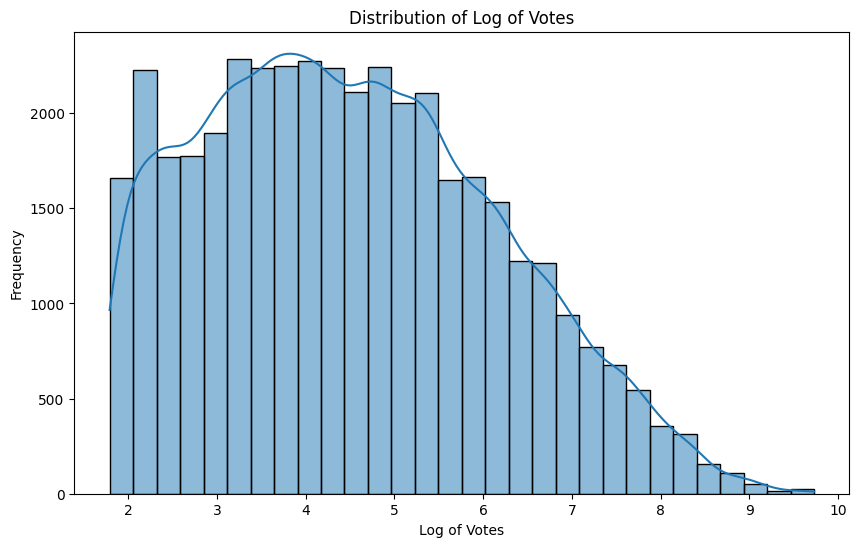

In [532]:
# prompt: plot votes_log

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(new_df['votes_log'], bins=30, kde=True)
plt.xlabel('Log of Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Log of Votes')
plt.show()


In [533]:
# prompt: multiply log column wih rate and create new column

new_df['votes_rate_log'] = new_df['votes_log'] * new_df['rate']


In [534]:
# prompt: drop votes_log

new_df = new_df.drop('votes_log', axis=1)


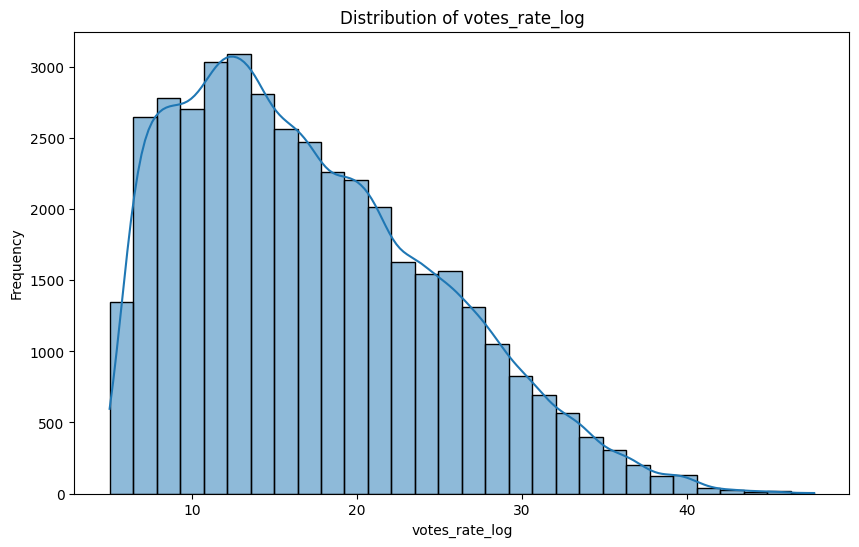

In [535]:
# prompt: plot votes_rate_log

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(new_df['votes_rate_log'], bins=30, kde=True)
plt.xlabel('votes_rate_log')
plt.ylabel('Frequency')
plt.title('Distribution of votes_rate_log')
plt.show()


In [536]:
new_df.head()

,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),num_cuisines,votes_rate_log
0,Yes,Yes,4.1,775,Casual Dining,800.0,Buffet,Other,3,27.282025
1,Yes,No,4.1,787,Casual Dining,800.0,Buffet,Other,3,27.344942
2,Yes,No,3.8,918,Other,800.0,Buffet,Other,3,25.928487
3,No,No,3.7,88,Quick Bites,300.0,Buffet,Other,2,16.607955
4,No,No,3.8,166,Casual Dining,600.0,Buffet,Other,2,19.448376


In [537]:
new_df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'num_cuisines', 'votes_rate_log'],
      dtype='object')

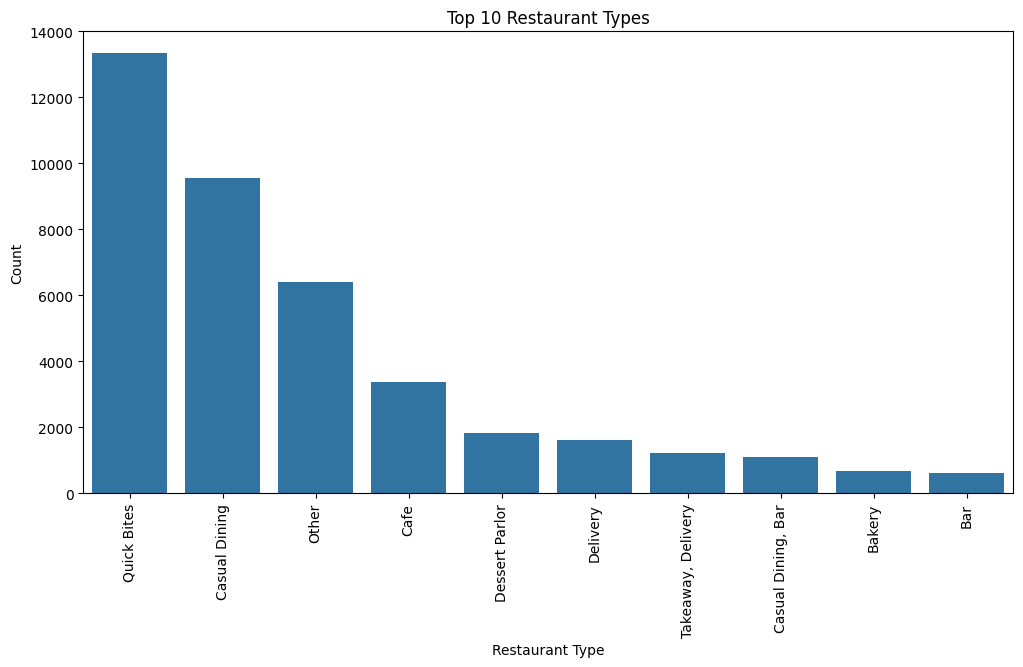

In [538]:
# prompt: plot rest_type countplot top 10

import matplotlib.pyplot as plt
# Count the occurrences of each 'rest_type'
rest_type_counts = new_df['rest_type'].value_counts()

# Select the top 10 most frequent restaurant types
top_10_rest_types = rest_type_counts.head(10)

# Create a countplot using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='rest_type', data=new_df, order=top_10_rest_types.index)
plt.xticks(rotation=90)
plt.title('Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.show()


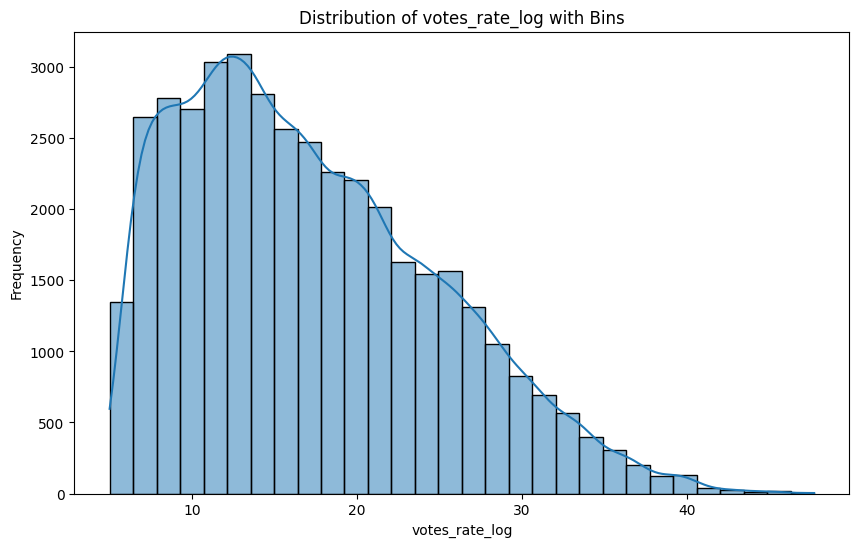

In [539]:
# prompt: plot votes_rate_log with bins

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(new_df['votes_rate_log'], bins=30, kde=True)
plt.xlabel('votes_rate_log')
plt.ylabel('Frequency')
plt.title('Distribution of votes_rate_log with Bins')
plt.show()


In [540]:
# # prompt: generate heatmap

# import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 10))
# sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()


In [541]:
# prompt: divide the votes_reg_log into 3 classes and their values in ascending order of value: [ 0,1,2]

import pandas as pd
new_df['votes_rate_log_class'] = pd.cut(new_df['votes_rate_log'], bins=3, labels=["un-popular","popular","famous"])



In [542]:
new_df.head(50)

,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),num_cuisines,votes_rate_log,votes_rate_log_class
0,Yes,Yes,4.1,775,Casual Dining,800.0,Buffet,Other,3,27.282025,popular
1,Yes,No,4.1,787,Casual Dining,800.0,Buffet,Other,3,27.344942,popular
2,Yes,No,3.8,918,Other,800.0,Buffet,Other,3,25.928487,popular
3,No,No,3.7,88,Quick Bites,300.0,Buffet,Other,2,16.607955,un-popular
4,No,No,3.8,166,Casual Dining,600.0,Buffet,Other,2,19.448376,popular
5,Yes,No,3.8,286,Casual Dining,600.0,Buffet,Other,1,21.506032,popular
6,No,No,3.6,8,Casual Dining,800.0,Buffet,Other,4,7.910008,un-popular
7,Yes,Yes,4.6,2556,Other,600.0,Cafes,Other,3,36.094314,famous
8,Yes,No,4.0,324,Cafe,700.0,Cafes,Other,3,23.135301,popular
9,Yes,No,4.2,504,Cafe,550.0,Cafes,Other,5,26.143145,popular


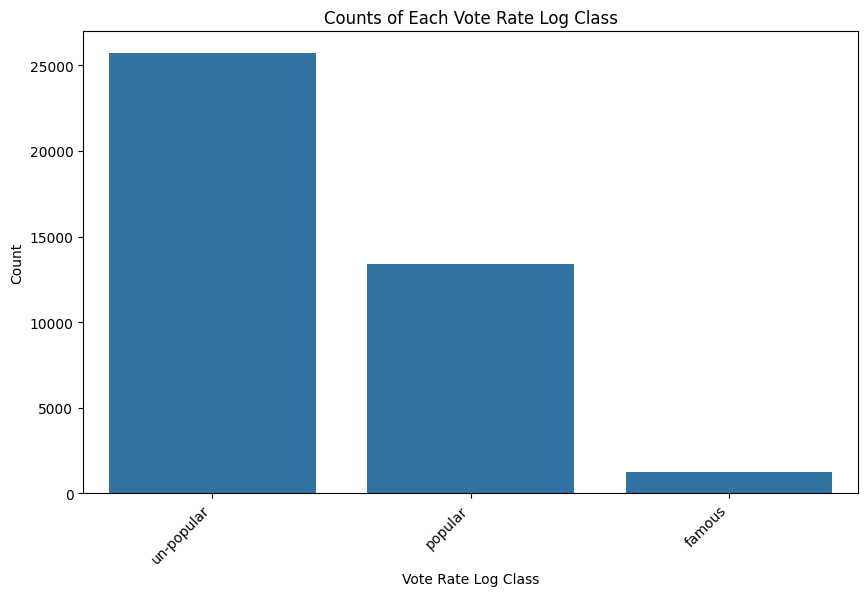

In [543]:
# prompt: make a countplot of votes_rate_log_class

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='votes_rate_log_class', data=new_df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Vote Rate Log Class')
plt.ylabel('Count')
plt.title('Counts of Each Vote Rate Log Class')
plt.show()


In [544]:
# prompt: remove votes_rate_log col

new_df = new_df.drop('votes_rate_log', axis=1)


In [545]:
new_df.head()

,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),num_cuisines,votes_rate_log_class
0,Yes,Yes,4.1,775,Casual Dining,800.0,Buffet,Other,3,popular
1,Yes,No,4.1,787,Casual Dining,800.0,Buffet,Other,3,popular
2,Yes,No,3.8,918,Other,800.0,Buffet,Other,3,popular
3,No,No,3.7,88,Quick Bites,300.0,Buffet,Other,2,un-popular
4,No,No,3.8,166,Casual Dining,600.0,Buffet,Other,2,popular


In [546]:
# prompt: Apply Label encoding on categorical cols in the dataset such that we can apply pickling later

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat=new_df[['book_table','online_order','rest_type', 'listed_in(type)', 'listed_in(city)','votes_rate_log_class']]
cat.head()

num=new_df.drop(columns=['book_table','online_order','rest_type', 'listed_in(type)', 'listed_in(city)','votes_rate_log_class'])
num.head()

# for column in ['book_table','online_order','rest_type', 'listed_in(type)', 'listed_in(city)']:
#   new_df[column] = le.fit_transform(new_df[column])

# new_cat=cat.apply(le.fit_transform)
# new_cat

,rate,votes,approx_cost(for two people),num_cuisines
0,4.1,775,800.0,3
1,4.1,787,800.0,3
2,3.8,918,800.0,3
3,3.7,88,300.0,2
4,3.8,166,600.0,2


In [547]:
# prompt: apply labelencoding on cat without forloop

new_cat = cat.apply(le.fit_transform)
new_cat


,book_table,online_order,rest_type,listed_in(type),listed_in(city),votes_rate_log_class
0,1,1,4,0,10,1
1,0,1,4,0,10,1
2,0,1,8,0,10,1
3,0,0,9,0,10,2
4,0,0,4,0,10,1
...,...,...,...,...,...,...
51709,0,0,5,6,10,2
51711,0,0,5,6,10,2
51712,0,0,1,6,10,2
51715,1,0,1,6,10,1


In [548]:
final_df=pd.concat([num,new_cat],axis=1)

In [549]:
final_df.head()

,rate,votes,approx_cost(for two people),num_cuisines,book_table,online_order,rest_type,listed_in(type),listed_in(city),votes_rate_log_class
0,4.1,775,800.0,3,1,1,4,0,10,1
1,4.1,787,800.0,3,0,1,4,0,10,1
2,3.8,918,800.0,3,0,1,8,0,10,1
3,3.7,88,300.0,2,0,0,9,0,10,2
4,3.8,166,600.0,2,0,0,4,0,10,1


In [550]:
d1=["Yes","Yes","No","Yes","No","No","No","Yes"]
d1=pd.DataFrame(d1)
d1.head()
le.fit(d1)
sample=le.transform(d1)
sample[0]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1

In [551]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

   # ... (previous code where you fit the encoder on some data)

user_input = "Yes"

if user_input in le.classes_:
    encoded_value = le.transform([user_input])
    print(f"Encoded value: {encoded_value[0]}")
else:
    print(f"Unseen label: {user_input}")
    # Handle the unseen label (e.g., retrain, assign default, etc.)

Encoded value: 1


In [552]:
new_df.head()

,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),num_cuisines,votes_rate_log_class
0,Yes,Yes,4.1,775,Casual Dining,800.0,Buffet,Other,3,popular
1,Yes,No,4.1,787,Casual Dining,800.0,Buffet,Other,3,popular
2,Yes,No,3.8,918,Other,800.0,Buffet,Other,3,popular
3,No,No,3.7,88,Quick Bites,300.0,Buffet,Other,2,un-popular
4,No,No,3.8,166,Casual Dining,600.0,Buffet,Other,2,popular


In [553]:
new_df=final_df.copy()

In [554]:
new_df.head()

,rate,votes,approx_cost(for two people),num_cuisines,book_table,online_order,rest_type,listed_in(type),listed_in(city),votes_rate_log_class
0,4.1,775,800.0,3,1,1,4,0,10,1
1,4.1,787,800.0,3,0,1,4,0,10,1
2,3.8,918,800.0,3,0,1,8,0,10,1
3,3.7,88,300.0,2,0,0,9,0,10,2
4,3.8,166,600.0,2,0,0,4,0,10,1


In [555]:
# # Select the predictors and the target variable

X = new_df.drop(columns='votes_rate_log_class')

y = new_df['votes_rate_log_class']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training set and the test set
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((32304, 9), (8077, 9), (32304,), (8077,))

In [556]:
# # Scale the data with MaxAbsScaler
# # prompt: import maxabsscaler

# from sklearn.preprocessing import MaxAbsScaler
# scaler = MaxAbsScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Check the first few rows of the scaled data
# X_train_scaled[:5, :5]

In [557]:
# prompt: import LogisticRegression,DecisionTreeClassifier,RandomForestClassifie,GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [565]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('SGD Classifier', SGDClassifier(random_state=42)),
    ('Linear SVC', LinearSVC(random_state=42)),
    ('SVC', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
]

# Train, predict, and evaluate each model
model_scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='macro')
    recall = recall_score(y_test, y_pred,average='macro')
    f1 = f1_score(y_test, y_pred,average='macro')
    model_scores.append((name, accuracy, precision, recall, f1))

# Create a dataframe to store the scores of all models
model_scores_df = pd.DataFrame(model_scores, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the scores of all models
model_scores_df


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.931534,0.872890,0.865510,0.869080
1,SGD Classifier,0.819364,0.880199,0.621234,0.613824
2,Linear SVC,0.957286,0.935508,0.857686,0.890063
3,SVC,0.926829,0.886952,0.873937,0.880292
4,Decision Tree,0.999752,0.999750,0.999871,0.999810
5,Random Forest,0.999629,0.999624,0.998603,0.999113


In [559]:
X_train.shape

(32304, 9)

In [560]:
model=LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [567]:
# Assuming X_test is your test dataset and y_test is the corresponding target variable
# Get the first row of the test dataset
first_row = X_test.iloc[[0]]

# Make a prediction for the first row
prediction = model.predict(first_row)

# Print the prediction
print("Prediction for the first row:", prediction[0])

# You can also print the actual target value for comparison
print("Actual value for the first row:", y_test.iloc[0])


Prediction for the first row: 2
Actual value for the first row: 2


In [562]:
import pickle
with open('zomato_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the encoder to a pickle file
with open('zomato_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(le, encoder_file)

In [563]:
# prompt: download pickle files

from google.colab import files

files.download('zomato_model.pkl')
files.download('zomato_encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>